# Example 1

Create a simple workspace with a very specialized method and run toys.

See also the script `submit.condor` to submit to HT Condor.
e.g. on lxplus just run

    condor_submit submit.condor

In [1]:
from countingworkspace import create_workspace
import countingworkspace.utils
from countingworkspace.examples import NCATEGORIES, NPROCESS, NTRUE, EFFICIENCIES, EXPECTED_BKG_CAT

countingworkspace.utils.silence_roofit()

Welcome to JupyROOT 6.14/04


In [11]:
print(NCATEGORIES)            # number of reco-categories
print(NPROCESS)               # number of truth-processes
print(EXPECTED_BKG_CAT)       # number of background events selected in the reco-categories
print(NTRUE)                  # number of signal events at truth level

29
4
[1.3e+04 4.6e+04 1.9e+04 6.9e+03 6.4e+02 8.0e+01 7.7e+03 4.1e+03 6.9e+02
 6.1e+01 2.8e+02 3.5e+01 6.9e+02 3.2e+02 4.7e+02 1.1e+02 6.1e+02 9.8e+00
 6.5e+00 9.5e+01 5.3e+00 2.6e+00 5.5e+01 3.3e+01 8.2e+00 1.4e+00 4.7e+00
 4.9e+00 2.2e+00]
[8149.8   639.2   359.55  103.87]


In [3]:
print(EFFICIENCIES)           # efficiencies: probability for a particular event for a particular
                              # truth-process to be selected in a particulare reco-category

[[7.59656034e-02 1.04604628e-02 1.45411863e-02 1.99323973e-04]
 [1.33594250e-01 2.02726463e-02 3.01054468e-02 4.64708281e-04]
 [6.32722516e-02 4.93284896e-02 4.10382246e-02 1.61497714e-03]
 [3.06301561e-02 5.44006917e-02 3.60505886e-02 1.75309571e-03]
 [5.80297648e-03 1.72063389e-02 1.08921484e-02 7.53345470e-04]
 [1.47098772e-03 5.09554732e-03 3.25223363e-03 2.83602730e-04]
 [1.64200334e-02 2.34817187e-02 3.26838551e-02 2.00158007e-02]
 [1.32634439e-02 2.65507197e-02 2.95846158e-02 2.05596601e-02]
 [5.41438547e-03 1.15379354e-02 1.34674271e-02 8.45197096e-03]
 [1.32996028e-03 2.26448816e-03 3.69473056e-03 2.83567831e-03]
 [1.58368047e-03 3.77259060e-02 7.13420676e-04 5.79753334e-04]
 [4.11651139e-04 3.59157521e-02 1.52405157e-04 4.01419976e-04]
 [3.02746026e-03 1.23900366e-02 3.90893629e-03 3.89613886e-03]
 [2.46153506e-03 3.04511703e-02 3.04539501e-03 6.76058076e-03]
 [2.55635930e-03 2.54552892e-03 2.21037070e-02 4.43348558e-03]
 [1.47979591e-03 1.28219234e-03 2.68690187e-02 2.910740

In [4]:
# generate the workspace
ws = create_workspace(NCATEGORIES, NPROCESS, NTRUE, EFFICIENCIES, EXPECTED_BKG_CAT)

INFO:root:adding observables for 29 categories
INFO:root:adding efficiencies for 29 categories and 4 processes
INFO:root:adding expected events for 29 categories and 4 processes


In [5]:
# run 100 toys and save the fitted results into a ROOT file
countingworkspace.utils.toy_study(ws, 100, seed=42)

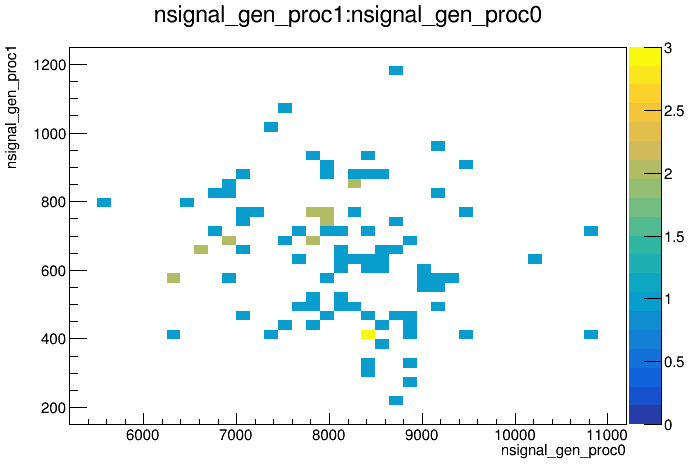

In [12]:
import ROOT
f = ROOT.TFile.Open('result_42.root')
tree = f.Get("results")

# plot the histogram fitted proc1 vs fitted proc0
canvas = ROOT.TCanvas()
tree.Draw("nsignal_gen_proc1:nsignal_gen_proc0", "", "colz")
canvas.Draw()

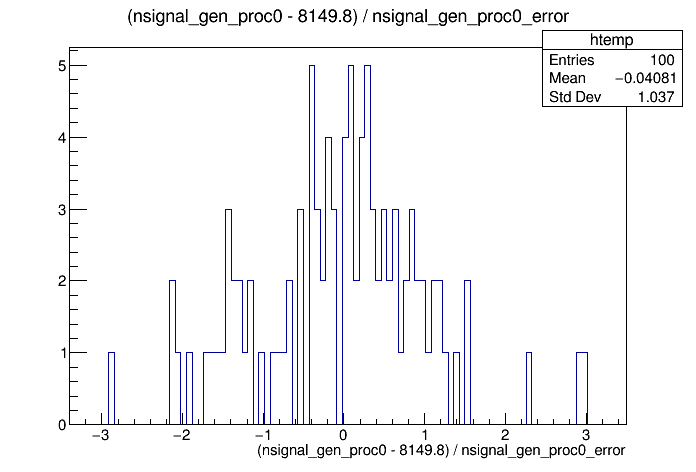

In [15]:
# plot the pulls for proc0
canvas = ROOT.TCanvas()
tree.Draw("(nsignal_gen_proc0 - {}) / nsignal_gen_proc0_error".format(NTRUE[0]))
canvas.Draw()